In [132]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.plotting.register_matplotlib_converters()
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
sns.mpl.rc("figure", figsize=(16, 6))

In [133]:
gross_data = pd.read_csv('https://raw.githubusercontent.com/tacookson/data/master/broadway-grosses/grosses.csv',parse_dates = ['week_ending'])
show_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/show_info_1985-2019.csv')
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])

In [134]:
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])
CPI_data.rename(columns = {'CWSR0000SA0':'CPI'}, inplace = True)
gross_data['year'] = gross_data['week_ending'].dt.year
gross_data['month_c'] = [d.strftime('%b') for d in gross_data.week_ending]
gross_data['month'] = gross_data['week_ending'].dt.month
CPI_data['year'] = CPI_data['DATE'].dt.year
CPI_data['month']= CPI_data['DATE'].dt.month
gross_data

,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,3915937.00,42nd Street,St. James Theatre,282368.00,NaN,30.42,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,3915937.00,A Chorus Line,Sam S. Shubert Theatre,222584.00,NaN,27.25,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,3915937.00,Aren't We All?,Brooks Atkinson Theatre,249272.00,NaN,33.75,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,3915937.00,Arms and the Man,Circle in the Square Theatre,95688.00,NaN,20.87,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,3915937.00,As Is,Lyceum Theatre,61059.00,NaN,20.78,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,26109896.25,The Phantom of the Opera,Majestic Theatre,639215.93,1358986.0,72.18,213.0,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,26109896.25,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1320766.00,1566688.0,132.02,297.0,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,26109896.25,To Kill A Mockingbird,Sam S. Shubert Theatre,1132278.54,1549625.0,115.41,423.0,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,26109896.25,West Side Story,Broadway Theatre,1598947.32,1722464.0,114.87,373.0,13920,1740,1.0000,8,0,2020,Mar,3


In [135]:
CPI_data['CPI'] = CPI_data.iloc[-1]['CPI']/CPI_data['CPI']
CPI_data

,DATE,CPI,year,month
0,1947-01-01,13.148889,1947,1
1,1947-02-01,13.064213,1947,2
2,1947-03-01,12.839783,1947,3
3,1947-04-01,12.839783,1947,4
4,1947-05-01,12.863043,1947,5
...,...,...,...,...
899,2021-12-01,1.031327,2021,12
900,2022-01-01,1.024507,2022,1
901,2022-02-01,1.015750,2022,2
902,2022-03-01,1.001908,2022,3


In [136]:
CPI_data2 = CPI_data[['CPI','month','year']]
gross_data2 = gross_data.merge(CPI_data2, how = 'left', on = ['month', 'year'])
gross_data['weekly_gross_overall'] = gross_data2['weekly_gross_overall']*gross_data2['CPI']
gross_data['weekly_gross'] = gross_data2['weekly_gross']*gross_data2['CPI']
gross_data['avg_ticket_price'] = gross_data2['avg_ticket_price']*gross_data2['CPI']
gross_data['potential_gross'] = gross_data2['potential_gross']*gross_data2['CPI']
gross_data['top_ticket_price']= gross_data2['top_ticket_price']*gross_data2['CPI']
gross_data['year']=gross_data.year.astype(int).astype(str)
gross_data


,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,1.040401e+07,42nd Street,St. James Theatre,7.502061e+05,NaN,80.821017,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,1.040401e+07,A Chorus Line,Sam S. Shubert Theatre,5.913697e+05,NaN,72.398840,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,1.040401e+07,Aren't We All?,Brooks Atkinson Theatre,6.622754e+05,NaN,89.668288,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,1.040401e+07,Arms and the Man,Circle in the Square Theatre,2.542275e+05,NaN,55.448213,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,1.040401e+07,As Is,Lyceum Theatre,1.622239e+05,NaN,55.209097,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,2.949006e+07,The Phantom of the Opera,Majestic Theatre,7.219681e+05,1.534919e+06,81.524345,240.574751,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,2.949006e+07,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1.491751e+06,1.769510e+06,149.111167,335.449300,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,2.949006e+07,To Kill A Mockingbird,Sam S. Shubert Theatre,1.278862e+06,1.750238e+06,130.350854,477.761125,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,2.949006e+07,West Side Story,Broadway Theatre,1.805945e+06,1.945452e+06,129.740947,421.288179,13920,1740,1.0000,8,0,2020,Mar,3


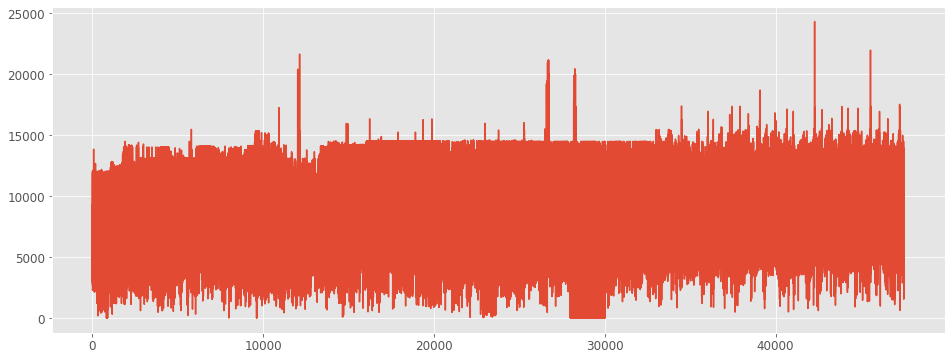

In [137]:
g_data = gross_data['seats_sold']
plt.plot(g_data)

In [138]:
df = gross_data[['seats_sold','year','month']]
df2 = df.groupby(['month','year']).mean().reset_index()
cols = ['year','month','day']
df2['day'] = [1 for _ in range(df2.shape[0])]
df2['date'] = df2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df2['date']=pd.to_datetime(df2['date'])
df3 = df2[['date','seats_sold']]
df3.set_index(['date'], inplace = True)
df3

,seats_sold
date,
1986-01-01,5840.228261
1987-01-01,6388.240000
1988-01-01,7574.163265
1989-01-01,7542.161616
1990-01-01,7437.012987
...,...
2015-12-01,7512.567568
2016-12-01,8231.333333
2017-12-01,8326.018987


In [139]:
y = df3.seats_sold
y = y.asfreq("MS")
y

date
1985-06-01    6981.432432
1985-07-01    6521.484848
1985-08-01    7414.534483
1985-09-01    6489.961039
1985-10-01    7260.788732
                 ...     
2019-11-01    8067.500000
2019-12-01    8881.511494
2020-01-01    9085.162393
2020-02-01    9366.692308
2020-03-01    8732.678571
Freq: MS, Name: seats_sold, Length: 418, dtype: float64

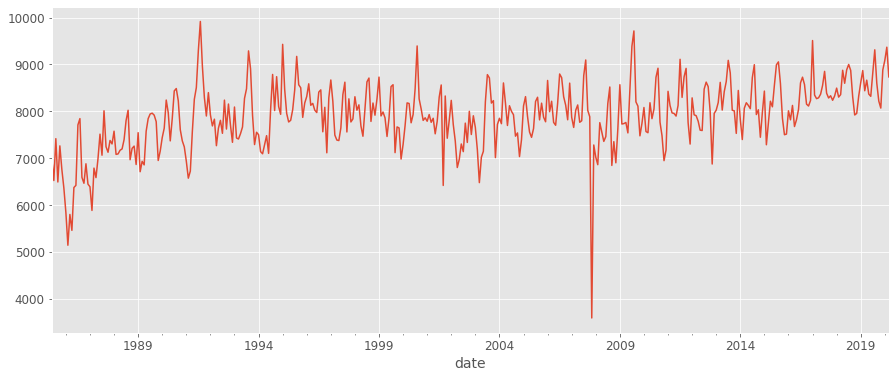

In [140]:
y.plot(figsize=(15, 6))
plt.show()

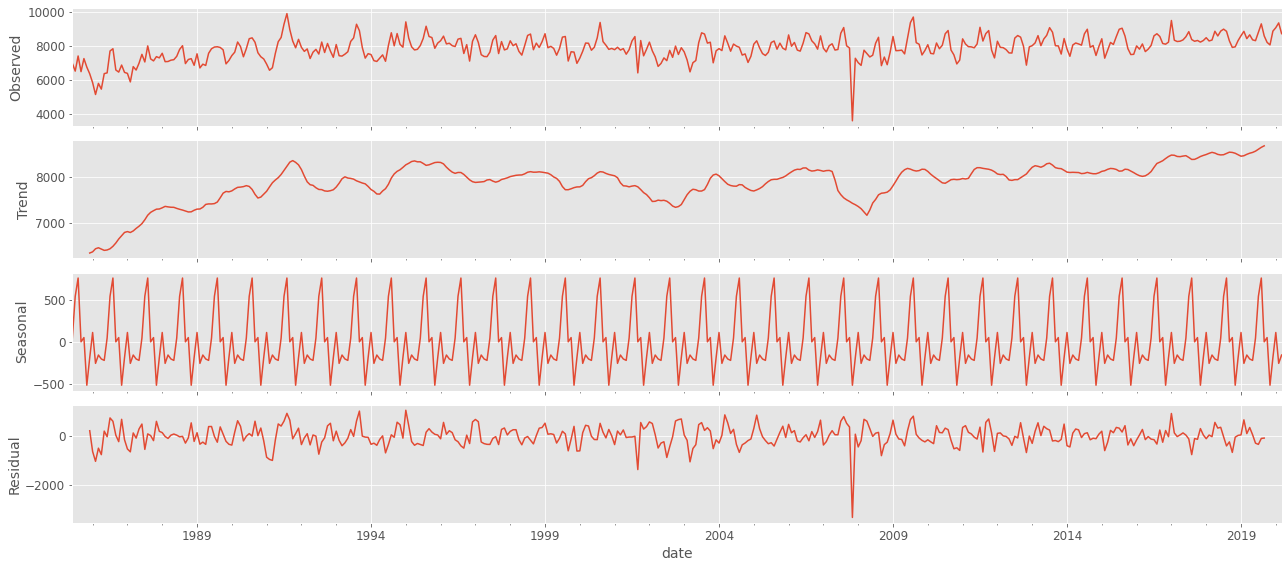

In [141]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [142]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [143]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:8672.449573406495
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:8154.760644741775
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:6424.9122080181005
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6122.738531676607
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6441.258811190539
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6348.786127126242
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:6149.0385298072815
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6094.461950258437
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:8357.41775094036
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7617.2052217992605
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:6313.5591854134345
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6012.522543834474
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6355.087293179256
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6353.341317836917
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6062.472706092187
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:5992.059507645242
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:6521.224736770325
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:6282.329679599636
ARIMA(0

AIC: Akaike Information Critera-An estimator of prediction error and thereby relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. 

AIC = $2k-2Ln(\hat{L})$

k=number of estimated parameters in the model

$\hat{L}$=maxiumum likelihood function of the model

In [144]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4907      0.036     13.451      0.000       0.419       0.562
ma.L1         -1.0208      0.014    -71.793      0.000      -1.049      -0.993
ar.S.L12      -0.4749      0.024    -19.631      0.000      -0.522      -0.428
sigma2      2.447e+05   7983.291     30.651      0.000    2.29e+05     2.6e+05


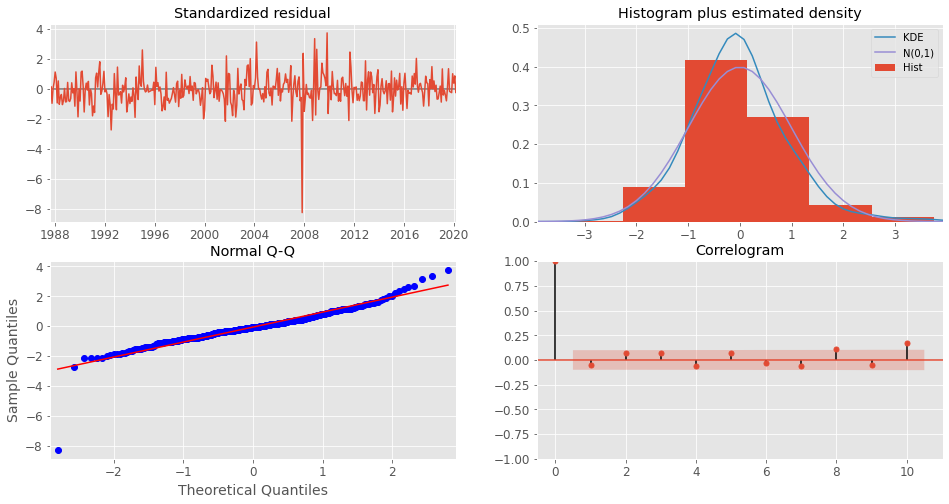

In [145]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

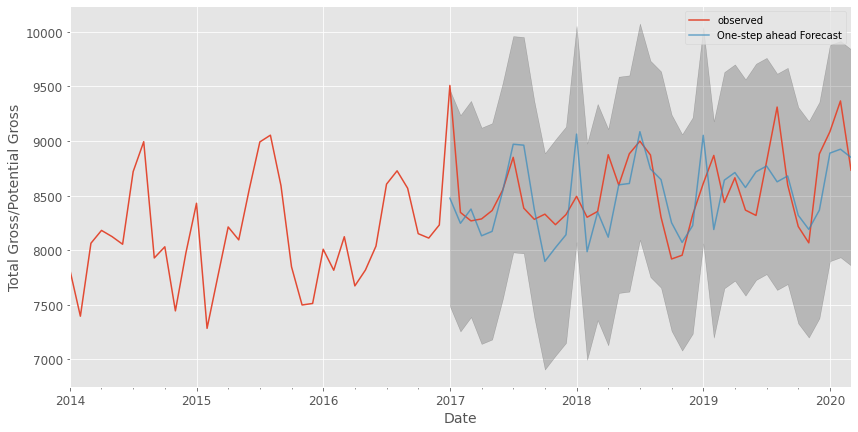

In [146]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Gross/Potential Gross')
plt.legend()
plt.show()

In [147]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 128832.52


In [148]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
ARIMAF_RMSE = round(np.sqrt(mse), 2)
ARIMAF_RMSE

The Root Mean Squared Error of our forecasts is 358.93


358.93

In [149]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=True,full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

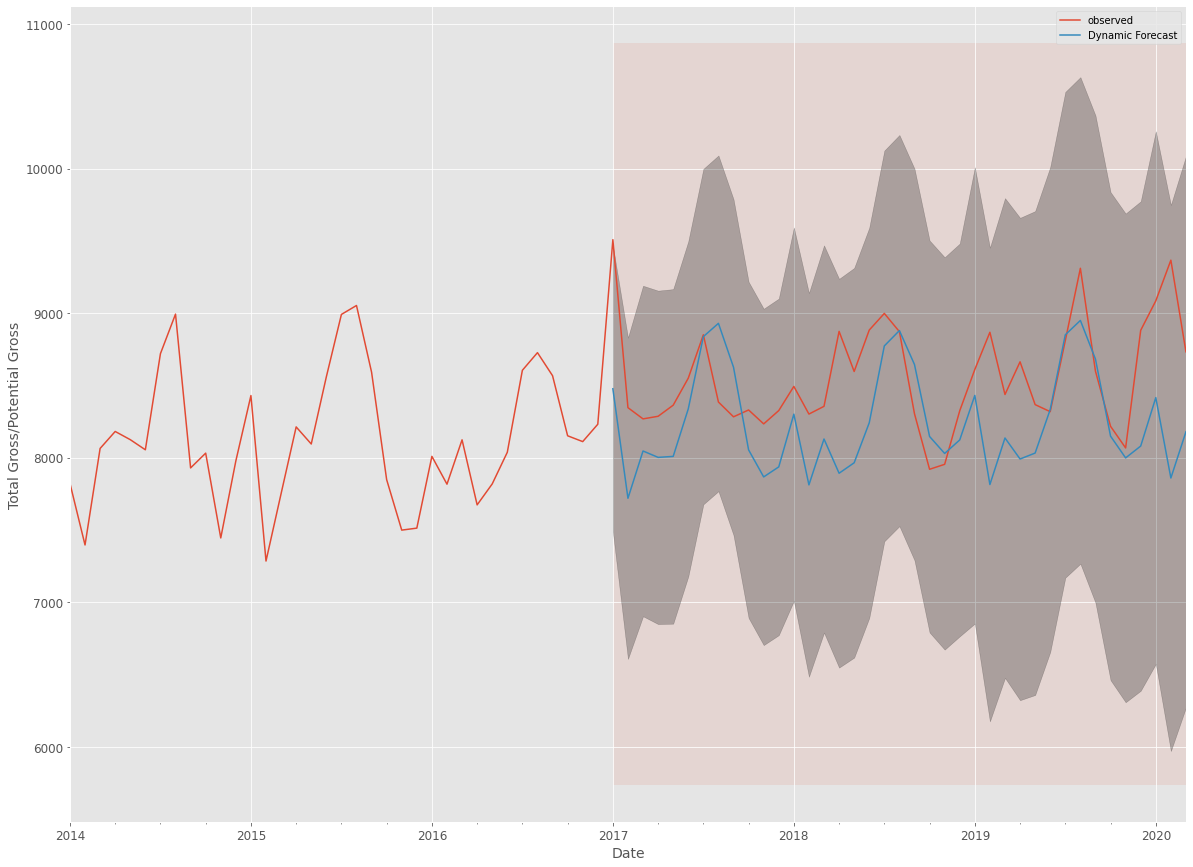

In [150]:
ax = y['2014':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Total Gross/Potential Gross')

plt.legend()
plt.show()

In [151]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 269649.89


In [152]:
print('The Root Mean Squared Error of our dyanmic forecasts is {}'.format(round(np.sqrt(mse), 2)))
ARIMADF_RMSE = round(np.sqrt(mse), 2)

The Root Mean Squared Error of our dyanmic forecasts is 519.28


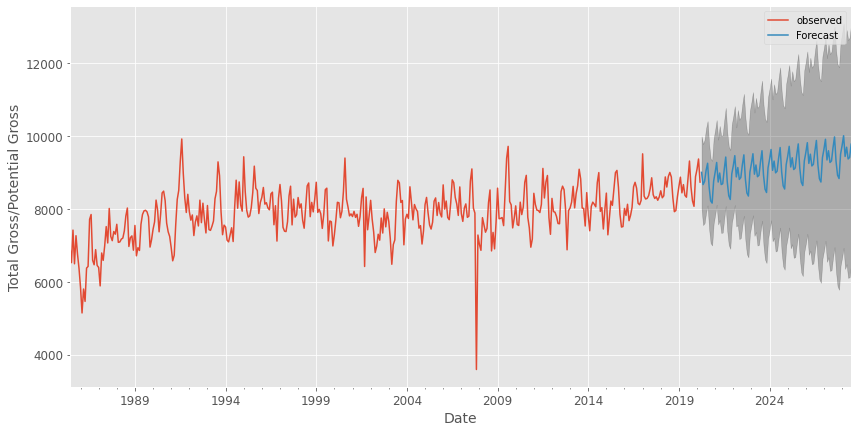

In [153]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total Gross/Potential Gross')
plt.legend()
plt.show()

In [154]:
df = gross_data[['seats_sold','week_ending','year','month']]
df2 = df.groupby(['month','year']).sum().reset_index()
df2

,month,year,seats_sold
0,1,1986,537301
1,1,1987,479118
2,1,1988,742268
3,1,1989,746674
4,1,1990,572650
...,...,...,...
413,12,2015,833895
414,12,2016,1061842
415,12,2017,1315511
416,12,2018,1614976


In [155]:
!pip install scalecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [156]:
from scalecast.Forecaster import Forecaster
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [157]:
f = Forecaster(y=y,
                   current_dates=y.index)

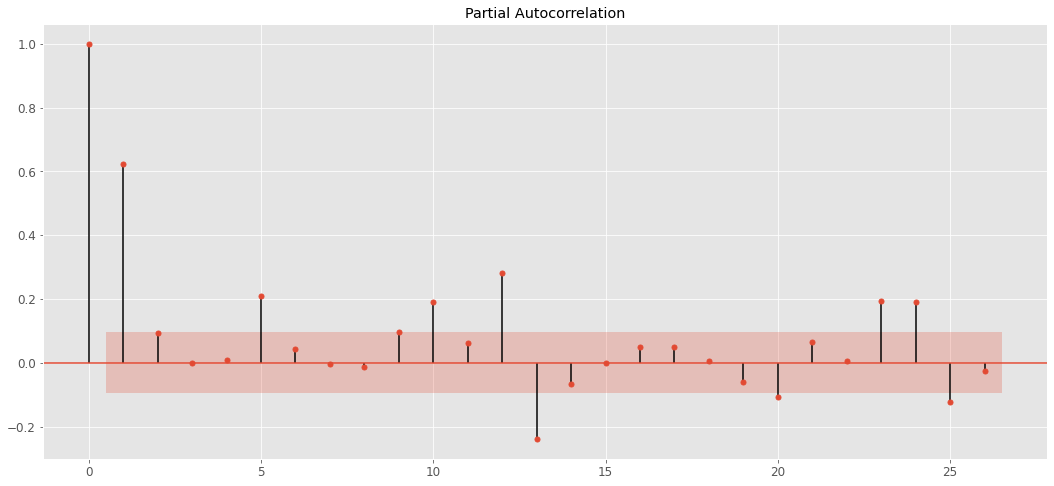

In [158]:
f.plot_pacf(lags=26)
plt.show()

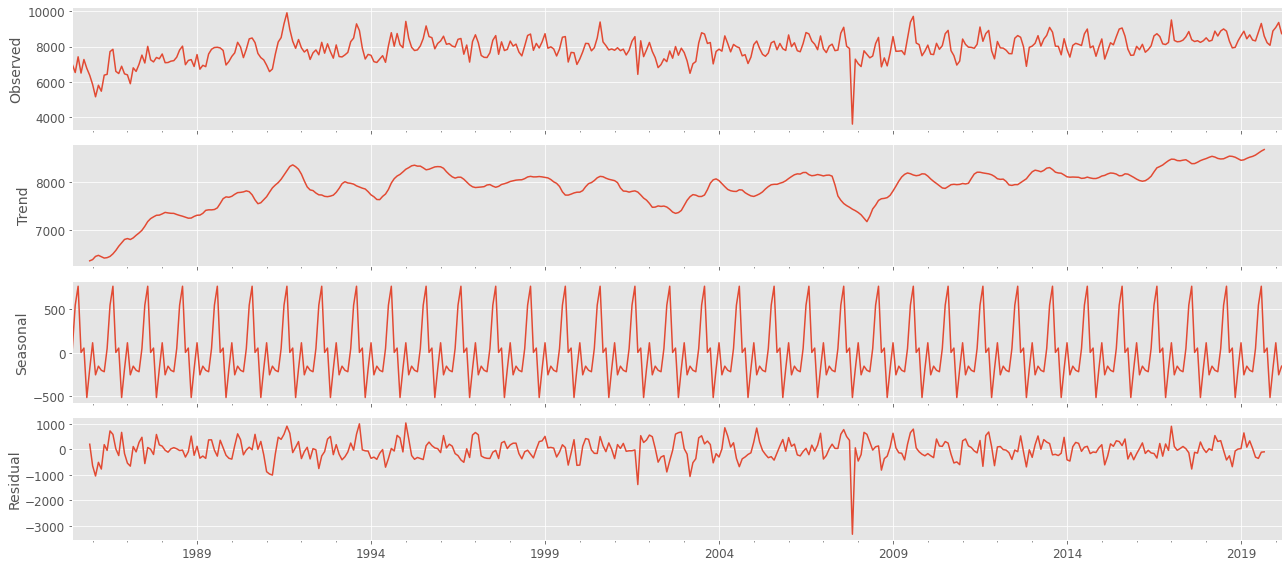

In [159]:
f.seasonal_decompose().plot()
plt.show()

In [160]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat,pval)

-3.7644233836707297 0.0032930199521034823


In [161]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(12) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural networkf.manual_forecast(call_me='lstm_default')


13/13 [==============================] - 2s 3ms/step - loss: 0.6773


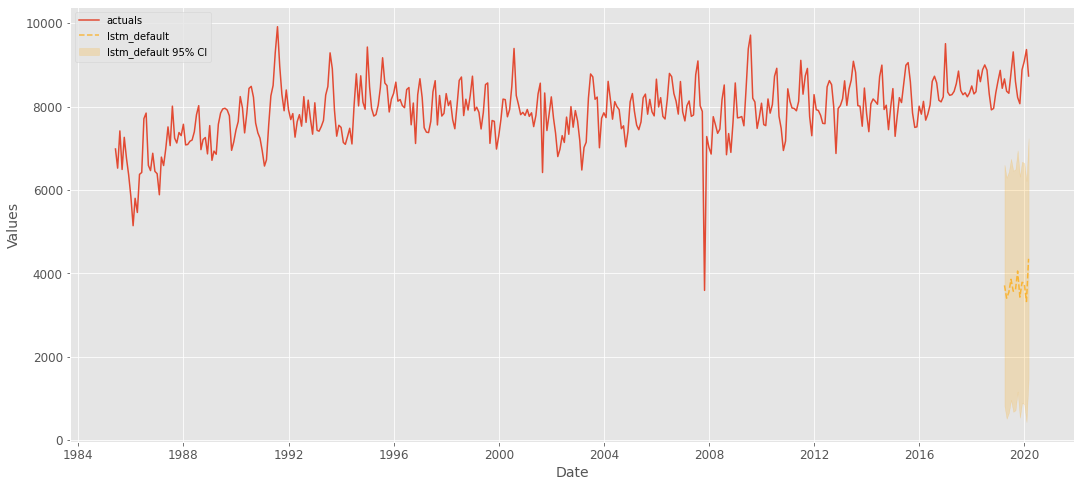

In [162]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

12/12 [==============================] - 5s 18ms/step - loss: 0.7199


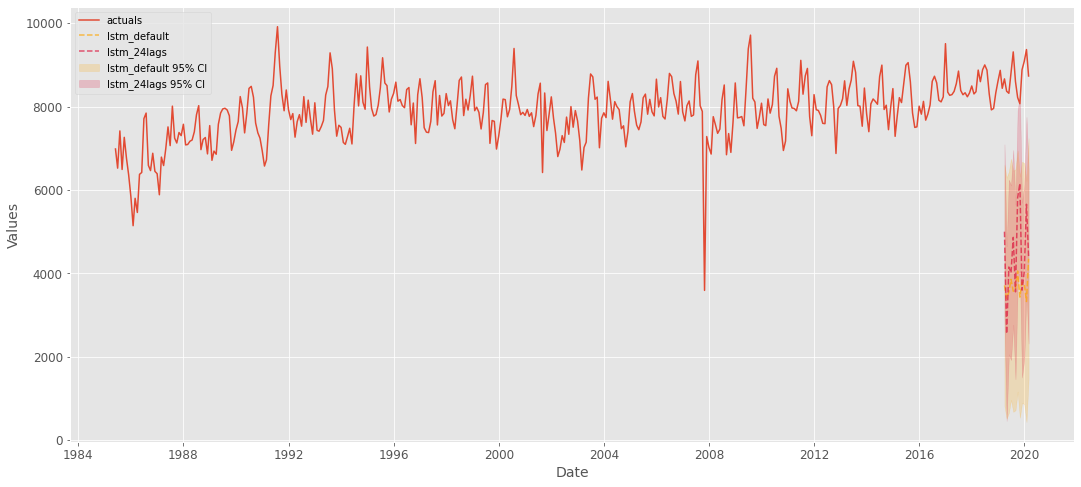

In [163]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

Epoch 1/5
10/10 [==============================] - 9s 191ms/step - loss: 0.6649 - val_loss: 0.5963
Epoch 2/5
10/10 [==============================] - 0s 43ms/step - loss: 0.6213 - val_loss: 0.5503
Epoch 3/5
10/10 [==============================] - 0s 41ms/step - loss: 0.5699 - val_loss: 0.4950
Epoch 4/5
10/10 [==============================] - 0s 23ms/step - loss: 0.5110 - val_loss: 0.4412
Epoch 5/5
10/10 [==============================] - 0s 33ms/step - loss: 0.4562 - val_loss: 0.3906
Epoch 1/5
10/10 [==============================] - 7s 141ms/step - loss: 0.7079 - val_loss: 0.6313
Epoch 2/5
10/10 [==============================] - 0s 22ms/step - loss: 0.6641 - val_loss: 0.5891
Epoch 3/5
10/10 [==============================] - 0s 25ms/step - loss: 0.6202 - val_loss: 0.5456
Epoch 4/5
10/10 [==============================] - 0s 23ms/step - loss: 0.5740 - val_loss: 0.4980
Epoch 5/5
10/10 [==============================] - 0s 15ms/step - loss: 0.5231 - val_loss: 0.4440


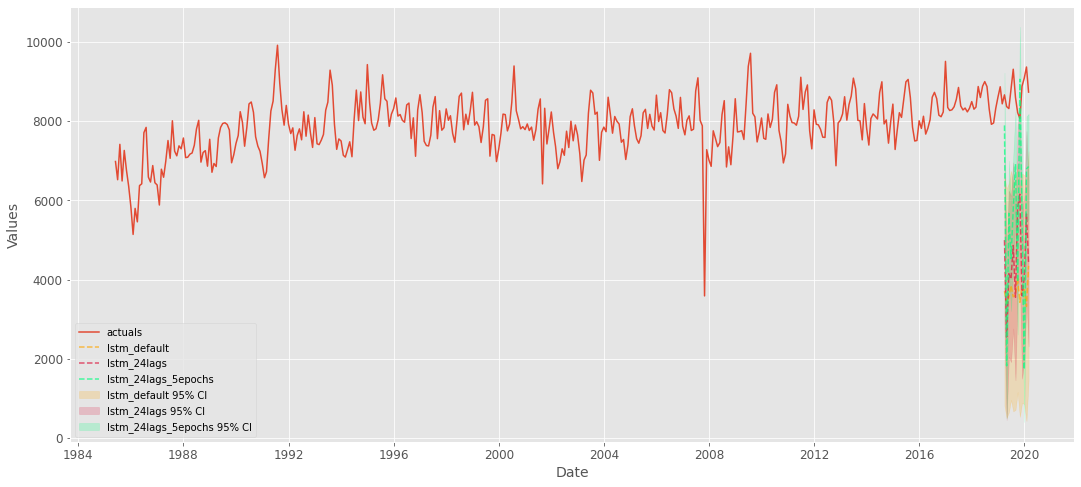

In [164]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Epoch 1/25
10/10 [==============================] - 8s 255ms/step - loss: 0.6851 - val_loss: 0.6020
Epoch 2/25
10/10 [==============================] - 0s 36ms/step - loss: 0.6037 - val_loss: 0.4814
Epoch 3/25
10/10 [==============================] - 0s 37ms/step - loss: 0.4359 - val_loss: 0.3140
Epoch 4/25
10/10 [==============================] - 0s 35ms/step - loss: 0.2748 - val_loss: 0.1928
Epoch 5/25
10/10 [==============================] - 0s 37ms/step - loss: 0.1803 - val_loss: 0.1565
Epoch 6/25
10/10 [==============================] - 0s 35ms/step - loss: 0.1338 - val_loss: 0.1159
Epoch 7/25
10/10 [==============================] - 0s 41ms/step - loss: 0.0977 - val_loss: 0.1008
Epoch 8/25
10/10 [==============================] - 0s 36ms/step - loss: 0.0778 - val_loss: 0.0901
Epoch 9/25
10/10 [==============================] - 0s 35ms/step - loss: 0.0702 - val_loss: 0.0898
Epoch 10/25
10/10 [==============================] - 0s 37ms/step - loss: 0.0703 - val_loss: 0.0882
Epoch 11

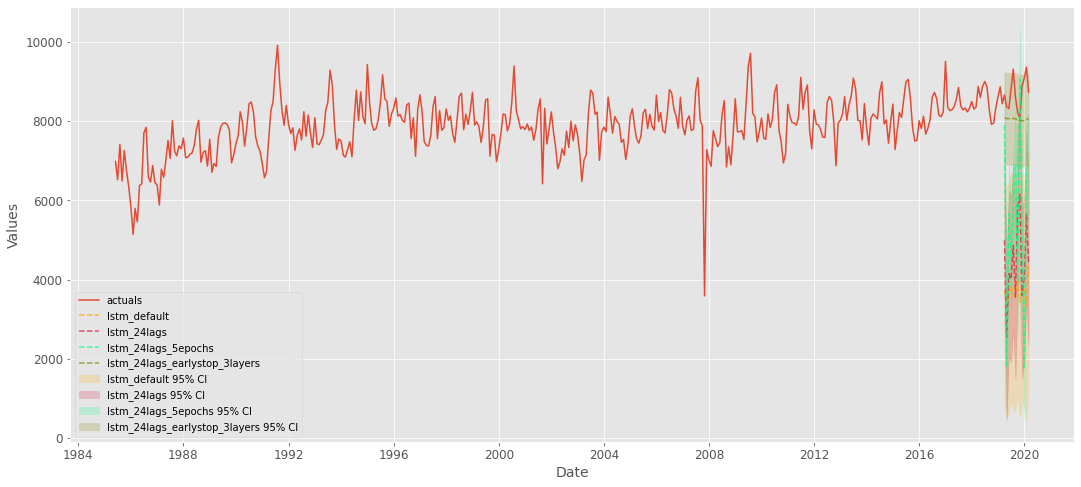

In [165]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

Epoch 1/15
9/9 [==============================] - 12s 327ms/step - loss: 0.4706 - val_loss: 0.1675
Epoch 2/15
9/9 [==============================] - 1s 96ms/step - loss: 0.1210 - val_loss: 0.1065
Epoch 3/15
9/9 [==============================] - 1s 99ms/step - loss: 0.0872 - val_loss: 0.0864
Epoch 4/15
9/9 [==============================] - 1s 106ms/step - loss: 0.0740 - val_loss: 0.0807
Epoch 5/15
9/9 [==============================] - 1s 107ms/step - loss: 0.0716 - val_loss: 0.0801
Epoch 6/15
9/9 [==============================] - 1s 106ms/step - loss: 0.0695 - val_loss: 0.0801
Epoch 7/15
9/9 [==============================] - 1s 107ms/step - loss: 0.0698 - val_loss: 0.0814
Epoch 8/15
9/9 [==============================] - 1s 109ms/step - loss: 0.0691 - val_loss: 0.0818
Epoch 9/15
9/9 [==============================] - 1s 107ms/step - loss: 0.0688 - val_loss: 0.0785
Epoch 10/15
9/9 [==============================] - 1s 106ms/step - loss: 0.0695 - val_loss: 0.0801
Epoch 11/15
9/9 [===

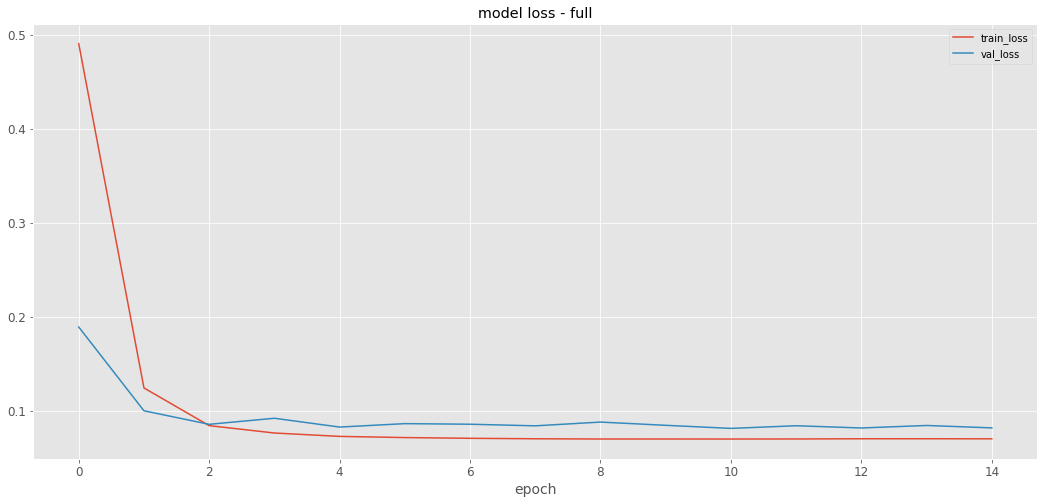

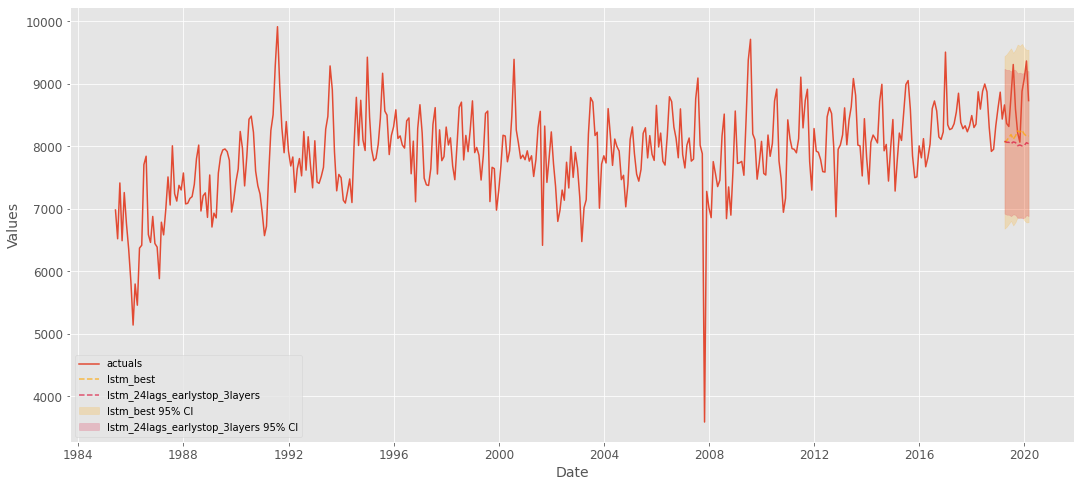

In [166]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [167]:
f.set_estimator('mlr') # 1. choose the mlr estimator
f.add_ar_terms(24) # 2. add regressors (24 lagged terms)
f.add_seasonal_regressors('month','quarter',dummy=True) # 2.
f.add_seasonal_regressors('year') # 2.
f.add_time_trend() # 2.
f.diff() # 3. difference non-stationary data

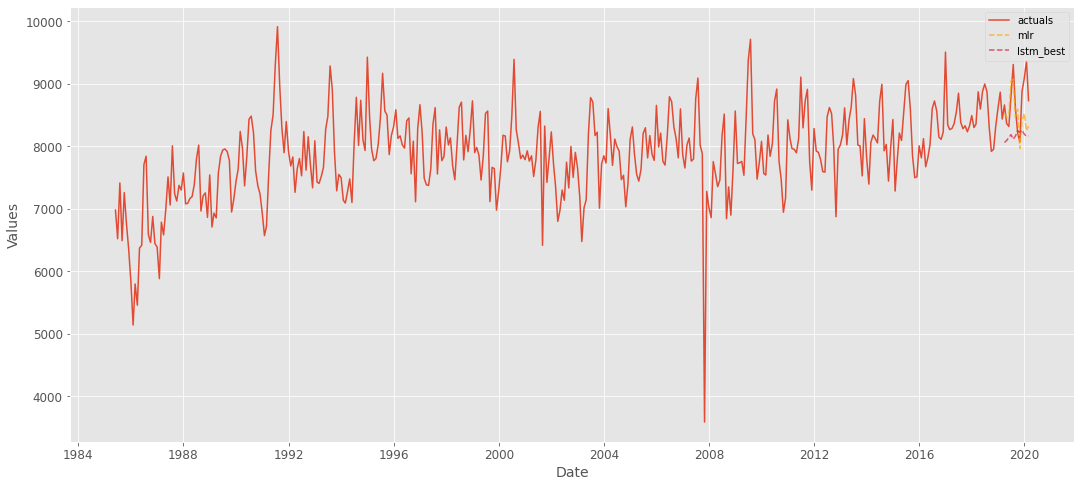

In [168]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')

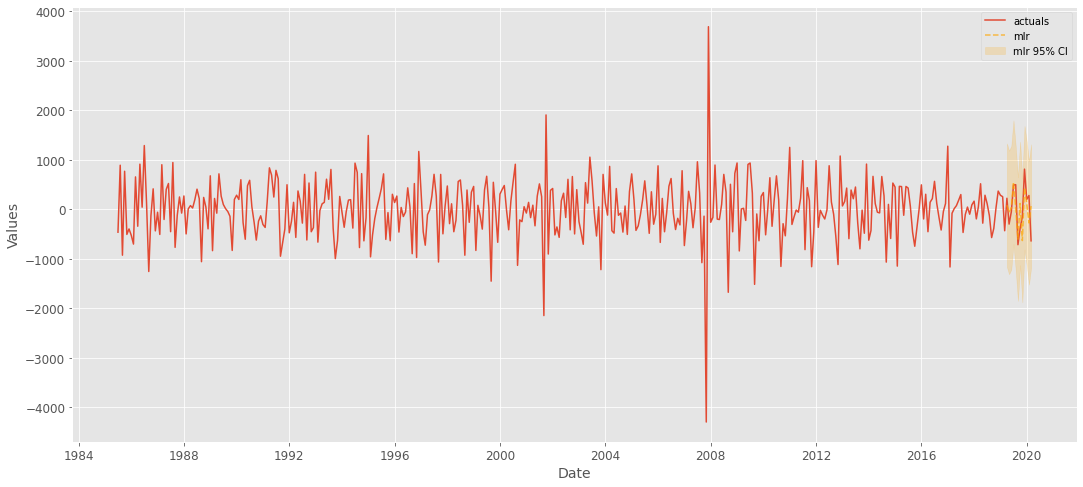

In [169]:
f.plot_test_set(models='mlr',ci=True)

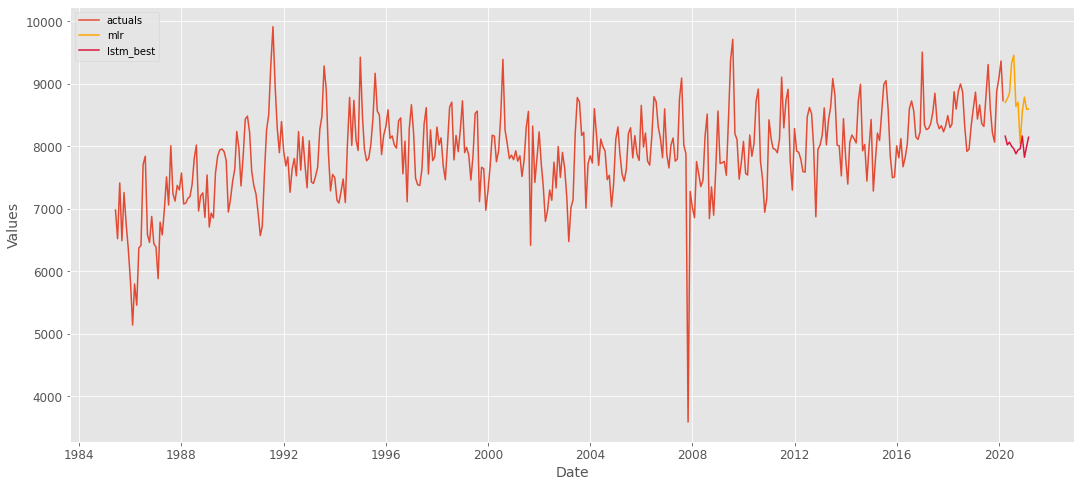

In [170]:
f.plot(models=['mlr','lstm_best'],
       order_by='LevelTestSetMAPE',
       level=True)

In [171]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,mlr,0.037942,436.492349,-0.195196,True
1,lstm_best,0.063114,673.439724,-1.845007,False
2,lstm_24lags_earlystop_3layers,0.073460,766.047696,-2.681269,False
3,lstm_24lags_5epochs,0.380885,3860.176475,-92.476016,False
4,lstm_24lags,0.483396,4361.421510,-118.327900,False
5,lstm_default,0.574206,5029.958934,-157.713824,False


In [173]:
err = f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname','LevelTestSetRMSE']]
MLR_RMSE = err[err['ModelNickname']=='mlr']['LevelTestSetRMSE'][0]
LSTM_RMSE = err[err['ModelNickname']=='lstm_best']['LevelTestSetRMSE']
LSTM_RMSE = LSTM_RMSE[1]
LSTM_RMSE

673.4397243631311

In [174]:
!pip install pystan


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [175]:
df = gross_data[['seats_sold','week_ending','year','month']]
df2 = df.groupby(['month','year']).sum().reset_index()
cols = ['year','month','day']
df2['day'] = [1 for _ in range(df2.shape[0])]
df2['date'] = df2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df2['date']=pd.to_datetime(df2['date'])
df3 = df2[['date','seats_sold']]
#df3.set_index(['date'], inplace = True)
df3


,date,seats_sold
0,1986-01-01,537301
1,1987-01-01,479118
2,1988-01-01,742268
3,1989-01-01,746674
4,1990-01-01,572650
...,...,...
413,2015-12-01,833895
414,2016-12-01,1061842
415,2017-12-01,1315511
416,2018-12-01,1614976


In [176]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        418 non-null    datetime64[ns]
 1   seats_sold  418 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.7 KB


In [177]:
df3 = df3.rename(columns={'date': 'ds',
                        'avg_ticket_price': 'y'})


In [178]:
from fbprophet import Prophet

In [179]:
plt.figure()
df3.set_index('ds').y.plot().get_figure()

AttributeError: ignored

<Figure size 1296x576 with 0 Axes>

In [ ]:
model = Prophet(weekly_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(df3);
model.weekly_seasonality

In [ ]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

In [ ]:
forecast = model.predict(future)

In [ ]:
forecast.tail()

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
model.plot(forecast);

In [ ]:
model.plot_components(forecast);

In [ ]:
metric_df = forecast.set_index('ds')[['yhat']].join(df3.set_index('ds').y).reset_index()

In [ ]:
metric_df.tail()

In [ ]:
metric_df.dropna(inplace=True)

In [ ]:
metric_df.tail()

In [180]:
!pip install ml_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [181]:
import ml_metrics as metrics

In [182]:
prophet_err = metrics.rmse(metric_df.y, metric_df.yhat)

In [184]:
error = pd.DataFrame({'ARIMAF-RMSE':ARIMAF_RMSE,'ARIMADF_RMSE':ARIMADF_RMSE,'LSTM':LSTM_RMSE,'MLR RMSE':MLR_RMSE,'PROPHET RMSE':prophet_err},index=[0])
error

,ARIMAF-RMSE,ARIMADF_RMSE,LSTM,MLR RMSE,PROPHET RMSE
0,358.93,519.28,673.439724,436.492349,1824.676015
